# Installing Dependencies, Importing Required Libraries and Loading Dataset

In [6]:
!pip install holidays
!pip install prophet==1.1.6

In [7]:
!pip show prophet

Name: prophet
Version: 1.1.6
Summary: Automatic Forecasting Procedure
Home-page: https://facebook.github.io/prophet/
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import HeatMap
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
df = pd.read_csv('/content/drive/MyDrive/GDG/Research Paper/Datasets/Crime_Data_from_2020_to_Present.csv')

# Viewing the Dataset

In [ ]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  200412582  09/09/2020 12:00:00 AM  09/09/2020 12:00:00 AM       630     4   

    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Wilshire          784         1     510   
1     Central          182         1     330   
2   Southwest          356         1     480   
3    Van Nuys          964         1     343   
4  Hollenbeck          413         1     510   

                                Crm Cd Desc         Mocodes  Vict Age  \
0                          VEHICLE - STOLEN             NaN         0   
1                     BURGLARY FROM VEHICLE  1822 1402 0344        47   
2                             BIKE - STOLEN       0344 1251        19   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)       0325 1501        19   
4                          VEHICLE - STOLEN             NaN         0   

  Vict Sex Vict Descent  Premis Cd  \
0        M            O      101.0   
1        M            O      128.0   
2        X            X      502.0   
3        M            O      405.0   
4      NaN          NaN      101.0   

                                    Premis Desc  Weapon Used Cd Weapon Desc  \
0                                        STREET             NaN         NaN   
1             BUS STOP/LAYOVER (ALSO QUERY 124)             NaN         NaN   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             NaN         NaN   
3                                CLOTHING STORE             NaN         NaN   
4                                        STREET             NaN         NaN   

  Status   Status Desc  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  \
0     AA  Adult Arrest     510.0     998.0       NaN       NaN   
1     IC   Invest Cont     330.0     998.0       NaN       NaN   
2     IC   Invest Cont     480.0       NaN       NaN       NaN   
3     IC   Invest Cont     343.0       NaN       NaN       NaN   
4     IC   Invest Cont     510.0       NaN       NaN       NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                          200 E  AVENUE 28          NaN  34.0820 -118.2130

In [ ]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [ ]:
df.shape

(1004876, 28)

In [ ]:
df.describe()

DR_NO      TIME OCC          AREA   Rpt Dist No      Part 1-2  \
count  1.004876e+06  1.004876e+06  1.004876e+06  1.004876e+06  1.004876e+06   
mean   2.202181e+08  1.339908e+03  1.069152e+01  1.115612e+03  1.400313e+00   
std    1.318945e+07  6.510752e+02  6.110263e+00  6.111605e+02  4.899620e-01   
min    8.170000e+02  1.000000e+00  1.000000e+00  1.010000e+02  1.000000e+00   
25%    2.106168e+08  9.000000e+02  5.000000e+00  5.870000e+02  1.000000e+00   
50%    2.209158e+08  1.420000e+03  1.100000e+01  1.139000e+03  1.000000e+00   
75%    2.311102e+08  1.900000e+03  1.600000e+01  1.613000e+03  2.000000e+00   
max    2.521040e+08  2.359000e+03  2.100000e+01  2.199000e+03  2.000000e+00   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  1.004876e+06  1.004876e+06  1.004860e+06   327202.000000  1.004865e+06   
mean   5.001385e+02  2.891943e+01  3.056070e+02      363.946791  4.998990e+02   
std    2.052628e+02  2.199244e+01  2.192918e+02      123.740557  2.050633e+02   
min    1.100000e+02 -4.000000e+00  1.010000e+02      101.000000  1.100000e+02   
25%    3.310000e+02  0.000000e+00  1.010000e+02      311.000000  3.310000e+02   
50%    4.420000e+02  3.000000e+01  2.030000e+02      400.000000  4.420000e+02   
75%    6.260000e+02  4.400000e+01  5.010000e+02      400.000000  6.260000e+02   
max    9.560000e+02  1.200000e+02  9.760000e+02      516.000000  9.560000e+02   

           Crm Cd 2     Crm Cd 3   Crm Cd 4           LAT           LON  
count  69131.000000  2315.000000   64.00000  1.004876e+06  1.004876e+06  
mean     958.113509   984.022030  991.21875  3.399820e+01 -1.180908e+02  
std      110.360323    52.340476   27.06985  1.610804e+00  5.582704e+00  
min      210.000000   310.000000  821.00000  0.000000e+00 -1.186676e+02  
25%      998.000000   998.000000  998.00000  3.401470e+01 -1.184305e+02  
50%      998.000000   998.000000  998.00000  3.405890e+01 -1.183225e+02  
75%      998.000000   998.000000  998.00000  3.416490e+01 -1.182739e+02  
max      999.000000   999.000000  999.00000  3.433430e+01  0.000000e+00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004876 non-null  int64  
 1   Date Rptd       1004876 non-null  object 
 2   DATE OCC        1004876 non-null  object 
 3   TIME OCC        1004876 non-null  int64  
 4   AREA            1004876 non-null  int64  
 5   AREA NAME       1004876 non-null  object 
 6   Rpt Dist No     1004876 non-null  int64  
 7   Part 1-2        1004876 non-null  int64  
 8   Crm Cd          1004876 non-null  int64  
 9   Crm Cd Desc     1004876 non-null  object 
 10  Mocodes         853279 non-null   object 
 11  Vict Age        1004876 non-null  int64  
 12  Vict Sex        860267 non-null   object 
 13  Vict Descent    860255 non-null   object 
 14  Premis Cd       1004860 non-null  float64
 15  Premis Desc     1004288 non-null  object 
 16  Weapon Used Cd  327202 non-null   fl

# Data Preprocessing

Choosing the columns that will be required for the final model training.

In [10]:
columns = ['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'LOCATION', 'LAT', 'LON']

In [11]:
df = df[columns]

In [12]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0  03/01/2020 12:00:00 AM      2130     7    Wilshire     510   
1  02/08/2020 12:00:00 AM      1800     1     Central     330   
2  11/04/2020 12:00:00 AM      1700     3   Southwest     480   
3  03/10/2020 12:00:00 AM      2037     9    Van Nuys     343   
4  09/09/2020 12:00:00 AM       630     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   DATE OCC     1004876 non-null  object 
 1   TIME OCC     1004876 non-null  int64  
 2   AREA         1004876 non-null  int64  
 3   AREA NAME    1004876 non-null  object 
 4   Crm Cd       1004876 non-null  int64  
 5   Crm Cd Desc  1004876 non-null  object 
 6   LOCATION     1004876 non-null  object 
 7   LAT          1004876 non-null  float64
 8   LON          1004876 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 69.0+ MB


Converting 'DATE OCC' and 'TIME OCC' columns to datetime type.

In [14]:
date = []

date = pd.to_datetime(df['DATE OCC'])

<ipython-input-14-034546e76a01>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date = pd.to_datetime(df['DATE OCC'])


In [15]:
df['DATE OCC'] = date

In [16]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01      2130     7    Wilshire     510   
1 2020-02-08      1800     1     Central     330   
2 2020-11-04      1700     3   Southwest     480   
3 2020-03-10      2037     9    Van Nuys     343   
4 2020-09-09       630     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [17]:
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: f"{x:04d}"[:2] + ':' + f"{x:04d}"[2:])

In [18]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M').dt.time

In [19]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

Spliting the 'DATE OCC' column into 'Day', 'Month', 'Year' and 'TIME OCC' into 'Hours', 'Minutes' and also label the timings as Early Morning, Morning, Afternoon, Evening, Night, Late Night.

In [20]:
df['Day'] = df['DATE OCC'].dt.day
df['Month'] = df['DATE OCC'].dt.month
df['Year'] = df['DATE OCC'].dt.year

df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020

In [21]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M:%S').dt.time

In [22]:
df['Hour'] = df['TIME OCC'].apply(lambda x: x.hour)
df['Minute'] = df['TIME OCC'].apply(lambda x: x.minute)

In [23]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  Hour  Minute  
0  2020    21      30  
1  2020    18       0  
2  2020    17       0  
3  2020    20      37  
4  2020     6      30

In [24]:
bins = [0, 6, 9, 12, 17, 21, 24]
labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

df['Time of Day'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)

In [25]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  Hour  Minute    Time of Day  
0  2020    21      30          Night  
1  2020    18       0        Evening  
2  2020    17       0        Evening  
3  2020    20      37        Evening  
4  2020     6      30  Early Morning

Checking the Day of the week, whether it was a weekend or not and whether it was a holiday or not.

In [26]:
df['Day of Week'] = df['DATE OCC'].dt.day_name()

In [27]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  Hour  Minute    Time of Day Day of Week  
0  2020    21      30          Night      Sunday  
1  2020    18       0        Evening    Saturday  
2  2020    17       0        Evening   Wednesday  
3  2020    20      37        Evening     Tuesday  
4  2020     6      30  Early Morning   Wednesday

In [28]:
df['Is_Weekend'] = (df['DATE OCC'].dt.weekday >= 5).astype(int)

In [29]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  Hour  Minute    Time of Day Day of Week  Is_Weekend  
0  2020    21      30          Night      Sunday           1  
1  2020    18       0        Evening    Saturday           1  
2  2020    17       0        Evening   Wednesday           0  
3  2020    20      37        Evening     Tuesday           0  
4  2020     6      30  Early Morning   Wednesday           0

In [30]:
us_holidays = holidays.US(years=df['DATE OCC'].dt.year.unique())

In [31]:
print(us_holidays)

{datetime.date(2020, 1, 1): "New Year's Day", datetime.date(2020, 5, 25): 'Memorial Day', datetime.date(2020, 7, 4): 'Independence Day', datetime.date(2020, 7, 3): 'Independence Day (observed)', datetime.date(2020, 9, 7): 'Labor Day', datetime.date(2020, 11, 11): 'Veterans Day', datetime.date(2020, 11, 26): 'Thanksgiving', datetime.date(2020, 12, 25): 'Christmas Day', datetime.date(2020, 1, 20): 'Martin Luther King Jr. Day', datetime.date(2020, 2, 17): "Washington's Birthday", datetime.date(2020, 10, 12): 'Columbus Day', datetime.date(2021, 1, 1): "New Year's Day", datetime.date(2021, 12, 31): "New Year's Day (observed)", datetime.date(2021, 5, 31): 'Memorial Day', datetime.date(2021, 6, 19): 'Juneteenth National Independence Day', datetime.date(2021, 6, 18): 'Juneteenth National Independence Day (observed)', datetime.date(2021, 7, 4): 'Independence Day', datetime.date(2021, 7, 5): 'Independence Day (observed)', datetime.date(2021, 9, 6): 'Labor Day', datetime.date(2021, 11, 11): 'Vete

In [32]:
df['Is_Holiday'] = df['DATE OCC'].dt.date.isin(us_holidays.keys()).astype(int)

In [33]:
df.head()

DATE OCC  TIME OCC  AREA   AREA NAME  Crm Cd  \
0 2020-03-01  21:30:00     7    Wilshire     510   
1 2020-02-08  18:00:00     1     Central     330   
2 2020-11-04  17:00:00     3   Southwest     480   
3 2020-03-10  20:37:00     9    Van Nuys     343   
4 2020-09-09  06:30:00     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  Day  Month  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506    1      3   
1   1000 S  FLOWER                       ST  34.0444 -118.2628    8      2   
2   1400 W  37TH                         ST  34.0210 -118.3002    4     11   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   10      3   
4                          200 E  AVENUE 28  34.0820 -118.2130    9      9   

   Year  Hour  Minute    Time of Day Day of Week  Is_Weekend  Is_Holiday  
0  2020    21      30          Night      Sunday           1           0  
1  2020    18       0        Evening    Saturday           1           0  
2  2020    17       0        Evening   Wednesday           0           0  
3  2020    20      37        Evening     Tuesday           0           0  
4  2020     6      30  Early Morning   Wednesday           0           0

In [34]:
columns = ['DATE OCC', 'Day', 'Month', 'Year', 'Day of Week', 'Is_Weekend', 'Is_Holiday', 'TIME OCC', 'Hour', 'Minute', 'Time of Day', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 'LOCATION', 'LAT', 'LON']

In [35]:
df = df[columns]

In [36]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0 2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1 2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2 2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3 2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4 2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd  \
0    21      30          Night     7    Wilshire     510   
1    18       0        Evening     1     Central     330   
2    17       0        Evening     3   Southwest     480   
3    20      37        Evening     9    Van Nuys     343   
4     6      30  Early Morning     4  Hollenbeck     510   

                                Crm Cd Desc  \
0                          VEHICLE - STOLEN   
1                     BURGLARY FROM VEHICLE   
2                             BIKE - STOLEN   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4                          VEHICLE - STOLEN   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

Grouping similar crimes together to reduce the number of class labels.

In [37]:
df['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'ARSON', 'BURGLARY',
       'PIMPING', 'PANDERING', 'OTHER MISCELLANEOUS CRIME',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'ROBBERY',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT OF IDENTITY', 'BATTERY - SIMPLE ASSAULT',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'BUNCO, GRAND THEFT',
       'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
       'TRESPASSING', 'VEHICLE - ATTEMPT STOLEN', 'RESISTING ARREST',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'BURGLARY FROM VEHICLE, ATTEMPTED',
       

In [38]:
crime_groups = {
    'Vehicle Theft': ['VEHICLE - STOLEN', 'BIKE - STOLEN', 'VEHICLE, STOLEN - OTHER', 'VEHICLE - ATTEMPT STOLEN'],
    'Theft': ['SHOPLIFTING-GRAND THEFT', 'SHOPLIFTING - PETTY THEFT', 'THEFT-GRAND', 'THEFT FROM MOTOR VEHICLE', 'THEFT FROM PERSON'],
    'Burglary': ['BURGLARY', 'BURGLARY FROM VEHICLE', 'BURGLARY, ATTEMPTED'],
    'Assault': ['ASSAULT', 'BATTERY', 'AGGRAVATED ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT'],
    'Robbery': ['ROBBERY', 'ATTEMPTED ROBBERY'],
    'Vandalism': ['VANDALISM', 'VANDALISM - FELONY'],
    'Drug Offenses': ['DRUGS', 'PIMPING', 'HUMAN TRAFFICKING'],
    'Sexual Offenses': ['RAPE', 'SEX OFFENDER', 'SEXUAL ASSAULT', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'BATTERY WITH SEXUAL CONTACT'],
    'Violence': ['MANSLAUGHTER', 'HOMICIDE', 'STABBING', 'SHOTS FIRED'],
    'Fraud': ['FRAUD', 'DOCUMENT FORGERY', 'COUNTERFEIT', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
    'Other': ['OTHER MISCELLANEOUS CRIME', 'TRESPASSING', 'FAILURE TO YIELD', 'DISTURBING THE PEACE'],
    'Weapons/Arms': ['WEAPONS POSSESSION/BOMBING', 'BRANDISH WEAPON'],
    'Kidnapping': ['KIDNAPPING', 'KIDNAPPING - GRAND ATTEMPT'],
    'Extortion': ['EXTORTION'],
    'Cyber Crimes': ['UNAUTHORIZED COMPUTER ACCESS'],
    'Public Disorder': ['LYNCHING'],
    'Stalking': ['STALKING'],
}

In [39]:
def categorize_crime(crime_desc):
    for group, keywords in crime_groups.items():
        if any(keyword in crime_desc for keyword in keywords):
            return group
    return 'Other'

In [40]:
df['Crm Cd Desc'] = df['Crm Cd Desc'].apply(categorize_crime)

In [41]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0 2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1 2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2 2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3 2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4 2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd    Crm Cd Desc  \
0    21      30          Night     7    Wilshire     510  Vehicle Theft   
1    18       0        Evening     1     Central     330       Burglary   
2    17       0        Evening     3   Southwest     480  Vehicle Theft   
3    20      37        Evening     9    Van Nuys     343          Theft   
4     6      30  Early Morning     4  Hollenbeck     510  Vehicle Theft   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [42]:
df['Crm Cd'] = pd.factorize(df['Crm Cd Desc'])[0]

In [43]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0 2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1 2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2 2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3 2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4 2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd    Crm Cd Desc  \
0    21      30          Night     7    Wilshire       0  Vehicle Theft   
1    18       0        Evening     1     Central       1       Burglary   
2    17       0        Evening     3   Southwest       0  Vehicle Theft   
3    20      37        Evening     9    Van Nuys       2          Theft   
4     6      30  Early Morning     4  Hollenbeck       0  Vehicle Theft   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004876 entries, 0 to 1004875
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   DATE OCC     1004876 non-null  datetime64[ns]
 1   Day          1004876 non-null  int32         
 2   Month        1004876 non-null  int32         
 3   Year         1004876 non-null  int32         
 4   Day of Week  1004876 non-null  object        
 5   Is_Weekend   1004876 non-null  int64         
 6   Is_Holiday   1004876 non-null  int64         
 7   TIME OCC     1004876 non-null  object        
 8   Hour         1004876 non-null  int64         
 9   Minute       1004876 non-null  int64         
 10  Time of Day  1004876 non-null  category      
 11  AREA         1004876 non-null  int64         
 12  AREA NAME    1004876 non-null  object        
 13  Crm Cd       1004876 non-null  int64         
 14  Crm Cd Desc  1004876 non-null  object        
 15  LOCATION     10

In [45]:
df.to_csv('/content/drive/MyDrive/GDG/Research Paper/Datasets/Clean_LA_Crime.csv', index=False)

# Visualizations

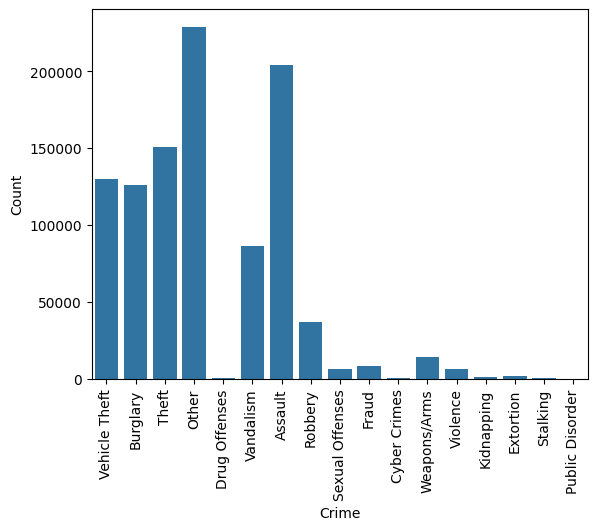

In [ ]:
sns.countplot(data=df, x='Crm Cd Desc')
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

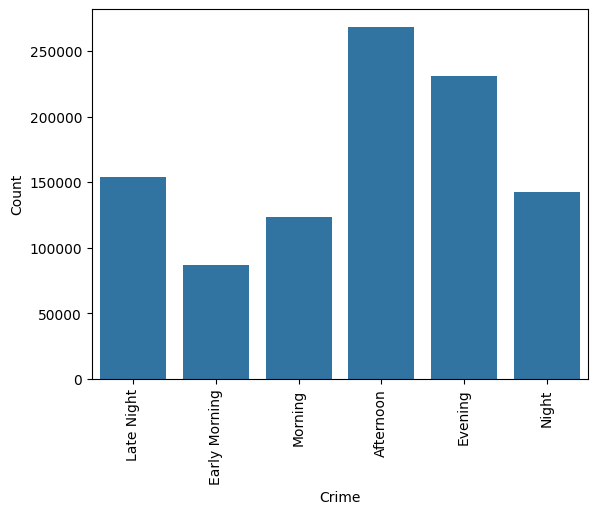

In [ ]:
sns.countplot(data=df, x='Time of Day')
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
crime_groups = {
    'Vehicle Theft': ['VEHICLE - STOLEN', 'BIKE - STOLEN', 'VEHICLE, STOLEN - OTHER', 'VEHICLE - ATTEMPT STOLEN'],
    'Theft': ['SHOPLIFTING-GRAND THEFT', 'SHOPLIFTING - PETTY THEFT', 'THEFT-GRAND', 'THEFT FROM MOTOR VEHICLE', 'THEFT FROM PERSON'],
    'Burglary': ['BURGLARY', 'BURGLARY FROM VEHICLE', 'BURGLARY, ATTEMPTED'],
    'Assault': ['ASSAULT', 'BATTERY', 'AGGRAVATED ASSAULT', 'INTIMATE PARTNER - SIMPLE ASSAULT'],
    'Robbery': ['ROBBERY', 'ATTEMPTED ROBBERY'],
    'Vandalism': ['VANDALISM', 'VANDALISM - FELONY'],
    'Drug Offenses': ['DRUGS', 'PIMPING', 'HUMAN TRAFFICKING'],
    'Sexual Offenses': ['RAPE', 'SEX OFFENDER', 'SEXUAL ASSAULT', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'BATTERY WITH SEXUAL CONTACT'],
    'Violence': ['MANSLAUGHTER', 'HOMICIDE', 'STABBING', 'SHOTS FIRED'],
    'Fraud': ['FRAUD', 'DOCUMENT FORGERY', 'COUNTERFEIT', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)'],
    'Other': ['OTHER MISCELLANEOUS CRIME', 'TRESPASSING', 'FAILURE TO YIELD', 'DISTURBING THE PEACE'],
    'Weapons/Arms': ['WEAPONS POSSESSION/BOMBING', 'BRANDISH WEAPON'],
    'Kidnapping': ['KIDNAPPING', 'KIDNAPPING - GRAND ATTEMPT'],
    'Extortion': ['EXTORTION'],
    'Cyber Crimes': ['UNAUTHORIZED COMPUTER ACCESS'],
    'Public Disorder': ['LYNCHING'],
    'Stalking': ['STALKING'],
}

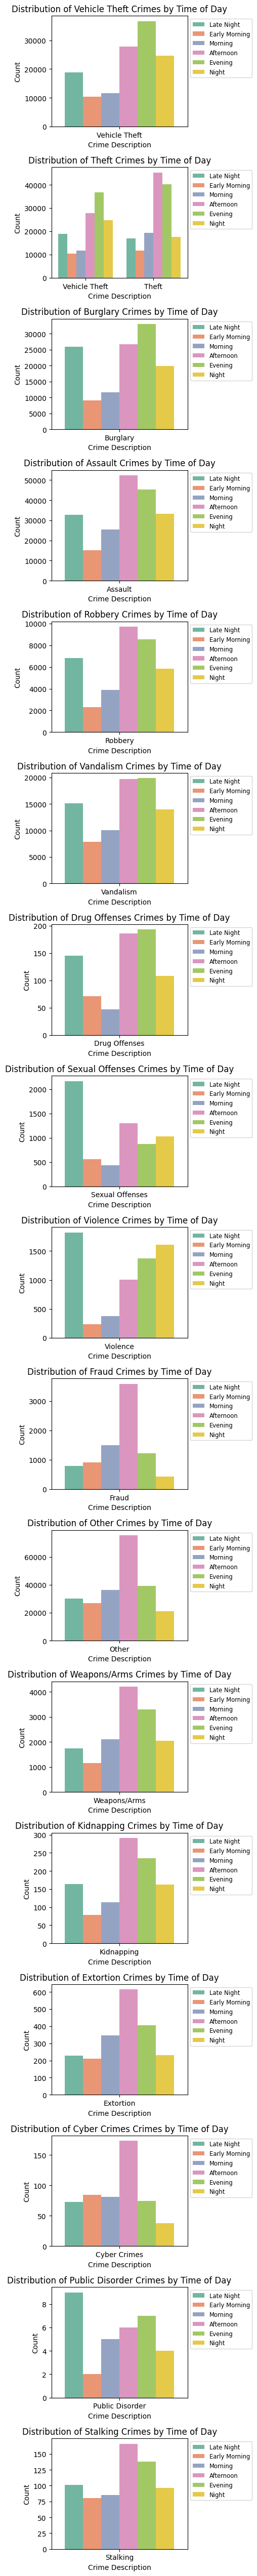

In [ ]:
fig, axes = plt.subplots(len(crime_groups), 1, figsize=(5, 3 * len(crime_groups)))

if len(crime_groups) == 1:
    axes = [axes]

for i, crime in enumerate(crime_groups):

    df_group = df[df['Crm Cd Desc'].str.contains(crime)]

    sns.countplot(data=df_group, x='Crm Cd Desc', hue='Time of Day', ax=axes[i], palette='Set2')

    axes[i].set_title(f'Distribution of {crime} Crimes by Time of Day')
    axes[i].set_xlabel('Crime Description')
    axes[i].set_ylabel('Count')

    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.tight_layout()
plt.show()

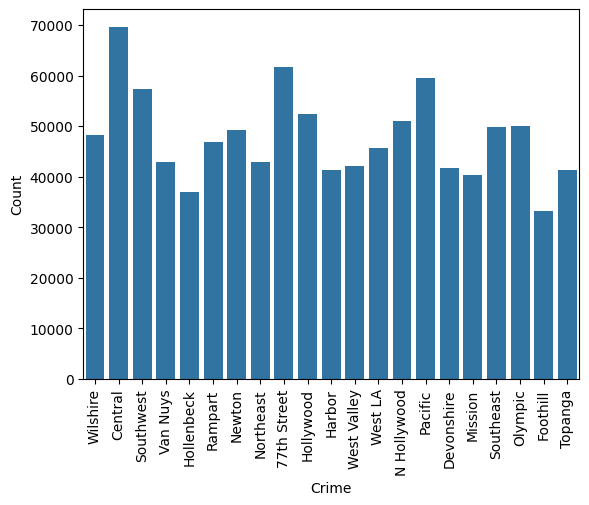

In [ ]:
sns.countplot(data=df, x='AREA NAME')
plt.xlabel('Crime')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Count')

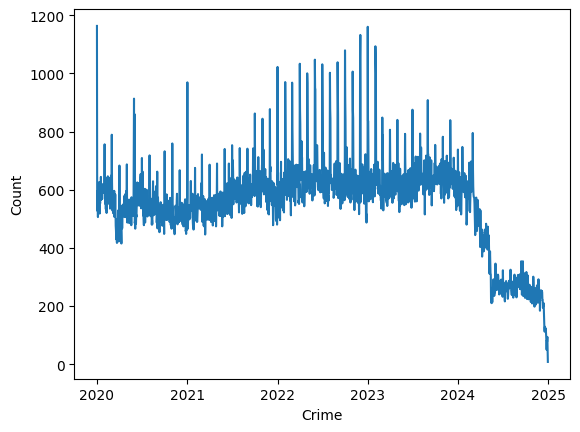

In [ ]:
crime_counts = df['DATE OCC'].value_counts().sort_index()

sns.lineplot(x=crime_counts.index, y=crime_counts.values)

plt.xlabel('Crime')
plt.ylabel('Count')

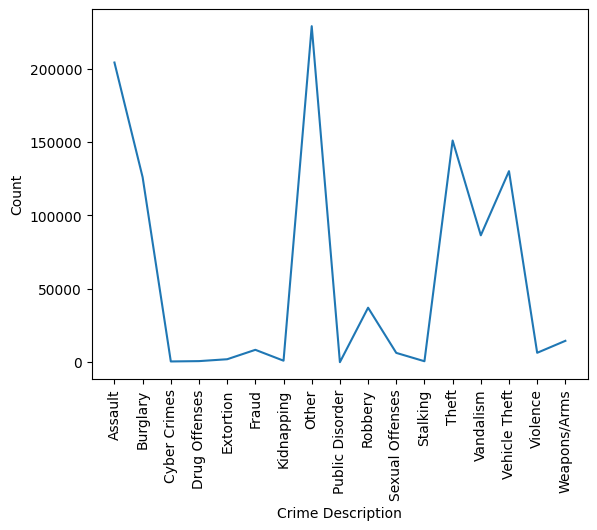

In [ ]:
crime_counts = df['Crm Cd Desc'].value_counts().sort_index()

sns.lineplot(x=crime_counts.index, y=crime_counts.values)

plt.xlabel('Crime Description')
plt.ylabel('Count')

plt.xticks(rotation=90)

plt.show()

<ipython-input-53-b09b51e03a9d>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
<ipython-input-53-b09b51e03a9d>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
<ipython-input-53-b09b51e03a9d>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
<ipython-input-53-b09b51e03a9d>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore ar

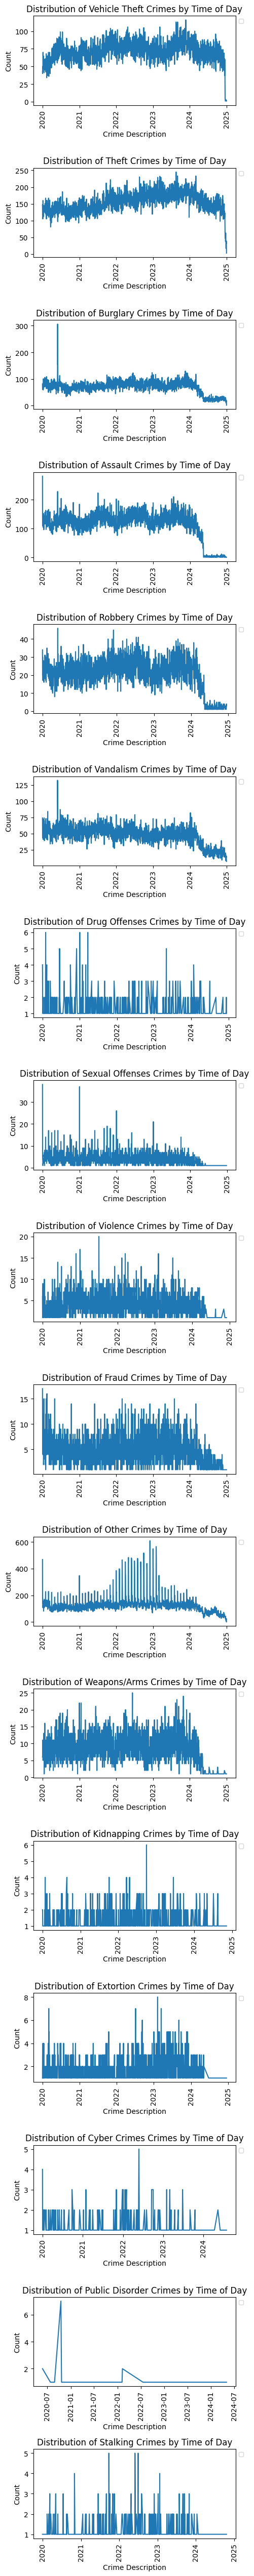

In [ ]:
fig, axes = plt.subplots(len(crime_groups), 1, figsize=(5, 3 * len(crime_groups)))

if len(crime_groups) == 1:
    axes = [axes]

for i, crime in enumerate(crime_groups):

    df_group = df[df['Crm Cd Desc'].str.contains(crime)]

    crime_counts = df_group['DATE OCC'].value_counts().sort_index()

    sns.lineplot(x=crime_counts.index, y=crime_counts.values, ax=axes[i])

    axes[i].set_title(f'Distribution of {crime} Crimes by Time of Day')
    axes[i].set_xlabel('Crime Description')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

plt.tight_layout()

plt.show()

# ARIMA Model Training

In [ ]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0 2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1 2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2 2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3 2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4 2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd    Crm Cd Desc  \
0    21      30          Night     7    Wilshire       0  Vehicle Theft   
1    18       0        Evening     1     Central       1       Burglary   
2    17       0        Evening     3   Southwest       0  Vehicle Theft   
3    20      37        Evening     9    Van Nuys       2          Theft   
4     6      30  Early Morning     4  Hollenbeck       0  Vehicle Theft   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [ ]:
df['DATE OCC'] = df['DATE OCC'].dt.strftime('%Y-%m-%d')

In [ ]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0  2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1  2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2  2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3  2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4  2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd    Crm Cd Desc  \
0    21      30          Night     7    Wilshire       0  Vehicle Theft   
1    18       0        Evening     1     Central       1       Burglary   
2    17       0        Evening     3   Southwest       0  Vehicle Theft   
3    20      37        Evening     9    Van Nuys       2          Theft   
4     6      30  Early Morning     4  Hollenbeck       0  Vehicle Theft   

                                   LOCATION      LAT       LON  
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506  
1   1000 S  FLOWER                       ST  34.0444 -118.2628  
2   1400 W  37TH                         ST  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR  34.1576 -118.4387  
4                          200 E  AVENUE 28  34.0820 -118.2130

In [ ]:
df['datetime'] = pd.to_datetime(df['DATE OCC'] + ' ' + df['TIME OCC'].astype(str))

In [ ]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  Is_Holiday  TIME OCC  \
0  2020-03-01    1      3  2020      Sunday           1           0  21:30:00   
1  2020-02-08    8      2  2020    Saturday           1           0  18:00:00   
2  2020-11-04    4     11  2020   Wednesday           0           0  17:00:00   
3  2020-03-10   10      3  2020     Tuesday           0           0  20:37:00   
4  2020-09-09    9      9  2020   Wednesday           0           0  06:30:00   

   Hour  Minute    Time of Day  AREA   AREA NAME  Crm Cd    Crm Cd Desc  \
0    21      30          Night     7    Wilshire       0  Vehicle Theft   
1    18       0        Evening     1     Central       1       Burglary   
2    17       0        Evening     3   Southwest       0  Vehicle Theft   
3    20      37        Evening     9    Van Nuys       2          Theft   
4     6      30  Early Morning     4  Hollenbeck       0  Vehicle Theft   

                                   LOCATION      LAT       LON  \
0   1900 S  LONGWOOD                     AV  34.0375 -118.3506   
1   1000 S  FLOWER                       ST  34.0444 -118.2628   
2   1400 W  37TH                         ST  34.0210 -118.3002   
3  14000    RIVERSIDE                    DR  34.1576 -118.4387   
4                          200 E  AVENUE 28  34.0820 -118.2130   

             datetime  
0 2020-03-01 21:30:00  
1 2020-02-08 18:00:00  
2 2020-11-04 17:00:00  
3 2020-03-10 20:37:00  
4 2020-09-09 06:30:00

In [ ]:
df.set_index('datetime', inplace=True)

In [ ]:
df.head()

DATE OCC  Day  Month  Year Day of Week  Is_Weekend  \
datetime                                                                    
2020-03-01 21:30:00  2020-03-01    1      3  2020      Sunday           1   
2020-02-08 18:00:00  2020-02-08    8      2  2020    Saturday           1   
2020-11-04 17:00:00  2020-11-04    4     11  2020   Wednesday           0   
2020-03-10 20:37:00  2020-03-10   10      3  2020     Tuesday           0   
2020-09-09 06:30:00  2020-09-09    9      9  2020   Wednesday           0   

                     Is_Holiday  TIME OCC  Hour  Minute    Time of Day  AREA  \
datetime                                                                       
2020-03-01 21:30:00           0  21:30:00    21      30          Night     7   
2020-02-08 18:00:00           0  18:00:00    18       0        Evening     1   
2020-11-04 17:00:00           0  17:00:00    17       0        Evening     3   
2020-03-10 20:37:00           0  20:37:00    20      37        Evening     9   
2020-09-09 06:30:00           0  06:30:00     6      30  Early Morning     4   

                      AREA NAME  Crm Cd    Crm Cd Desc  \
datetime                                                 
2020-03-01 21:30:00    Wilshire       0  Vehicle Theft   
2020-02-08 18:00:00     Central       1       Burglary   
2020-11-04 17:00:00   Southwest       0  Vehicle Theft   
2020-03-10 20:37:00    Van Nuys       2          Theft   
2020-09-09 06:30:00  Hollenbeck       0  Vehicle Theft   

                                                     LOCATION      LAT  \
datetime                                                                 
2020-03-01 21:30:00   1900 S  LONGWOOD                     AV  34.0375   
2020-02-08 18:00:00   1000 S  FLOWER                       ST  34.0444   
2020-11-04 17:00:00   1400 W  37TH                         ST  34.0210   
2020-03-10 20:37:00  14000    RIVERSIDE                    DR  34.1576   
2020-09-09 06:30:00                          200 E  AVENUE 28  34.0820   

                          LON  
datetime                       
2020-03-01 21:30:00 -118.3506  
2020-02-08 18:00:00 -118.2628  
2020-11-04 17:00:00 -118.3002  
2020-03-10 20:37:00 -118.4387  
2020-09-09 06:30:00 -118.2130

In [ ]:
crime_counts = df.resample('H').size()

<ipython-input-156-f99a6544af52>:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [ ]:
crime_counts.head()

datetime
2020-01-01 00:00:00    188
2020-01-01 01:00:00     58
2020-01-01 02:00:00     43
2020-01-01 03:00:00     30
2020-01-01 04:00:00     27
Freq: h, dtype: int64

In [ ]:
adf_result = adfuller(crime_counts)

adf_result

(-8.66206829293751,
 4.792628312599776e-14,
 55,
 43768,
 {'1%': -3.4304994170070295,
  '5%': -2.861606039041269,
  '10%': -2.5668051504336344},
 294999.7242935683)

In [ ]:
if adf_result[1] > 0.05:
    crime_counts_diff = crime_counts.diff().dropna()
    print('Needs Differencing')
else:
    crime_counts_diff = crime_counts
    print('No Need of Differencing')

No Need of Differencing


<Axes: xlabel='datetime'>

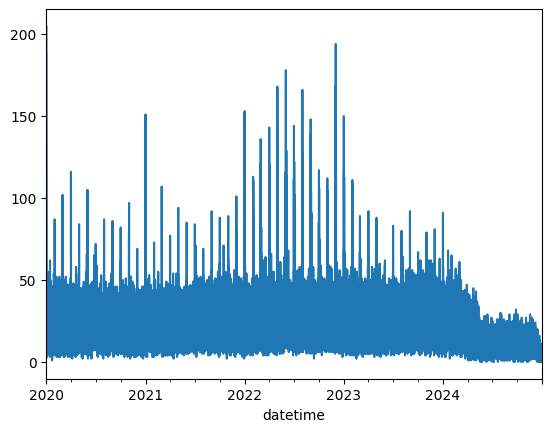

In [ ]:
crime_counts.plot()

In [ ]:
threshold = 10
crime_counts_binary = (crime_counts > threshold).astype(int)

In [ ]:
train, test = train_test_split(crime_counts_diff, test_size=0.3, shuffle=False)
train_bin, test_bin = train_test_split(crime_counts_binary, test_size=0.3, shuffle=False)

In [ ]:
arima_model = ARIMA(train, order=(1, 0, 1))
arima_fitted = arima_model.fit()

In [ ]:
arima_forecast = arima_fitted.forecast(steps=len(test))
arima_forecast_binary = (arima_forecast > threshold).astype(int)

In [ ]:
arima_accuracy = accuracy_score(test_bin, arima_forecast_binary)
arima_precision = precision_score(test_bin, arima_forecast_binary)
arima_recall = recall_score(test_bin, arima_forecast_binary)
arima_f1 = f1_score(test_bin, arima_forecast_binary)

In [ ]:
arima_metrics = {
    'Accuracy': arima_accuracy,
    'Precision': arima_precision,
    'Recall': arima_recall,
    'F1 Score': arima_f1
}

print(arima_metrics)

{'Accuracy': 0.8499391542439915, 'Precision': 0.8499391542439915, 'Recall': 1.0, 'F1 Score': 0.9188833614274555}


In [ ]:
arima_model = ARIMA(crime_counts_diff, order=(1, 1, 1))
arima_fitted = arima_model.fit()

In [ ]:
arima_forecast = arima_fitted.forecast(steps=24)

In [ ]:
arima_mse = mean_squared_error(crime_counts[-24:], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mape = mean_absolute_percentage_error(crime_counts[-24:], arima_forecast)

In [ ]:
arima_metrics = {
    'MSE': arima_mse,
    'RMSE': arima_rmse,
    'MAPE': arima_mape
}

print(arima_metrics)

{'MSE': 0.48889005577306094, 'RMSE': 0.6992067332149061, 'MAPE': 2550331373029090.0}


<Axes: >

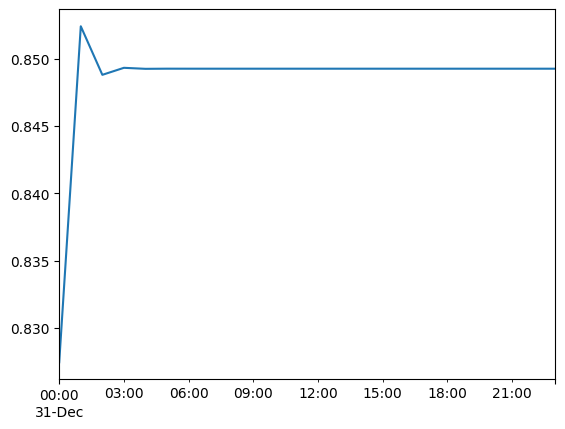

In [ ]:
arima_forecast.plot()

In [ ]:
arima_forecast = arima_fitted.forecast(steps=168)

In [ ]:
arima_mse = mean_squared_error(crime_counts[-168:], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mape = mean_absolute_percentage_error(crime_counts[-168:], arima_forecast)

In [ ]:
arima_metrics = {
    'MSE': arima_mse,
    'RMSE': arima_rmse,
    'MAPE': arima_mape
}

print(arima_metrics)

{'MSE': 7.7154782703015075, 'RMSE': 2.77767497564087, 'MAPE': 591921440987132.5}


<Axes: >

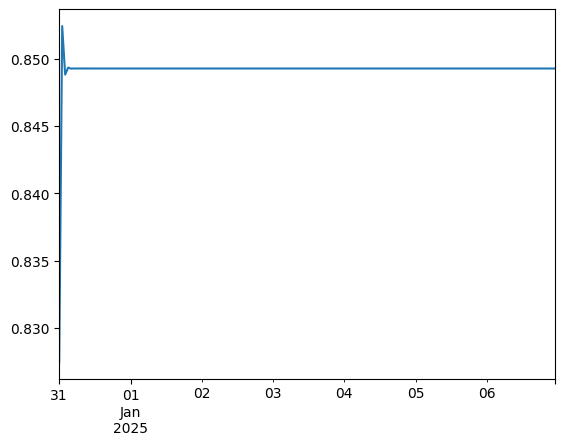

In [ ]:
arima_forecast.plot()

In [ ]:
arima_forecast = arima_fitted.forecast(steps=720)

In [ ]:
arima_mse = mean_squared_error(crime_counts[-720:], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mape = mean_absolute_percentage_error(crime_counts[-720:], arima_forecast)

In [ ]:
arima_metrics = {
    'MSE': arima_mse,
    'RMSE': arima_rmse,
    'MAPE': arima_mape
}

print(arima_metrics)

{'MSE': 55.76190072639802, 'RMSE': 7.467389150593266, 'MAPE': 196548262905106.5}


<Axes: >

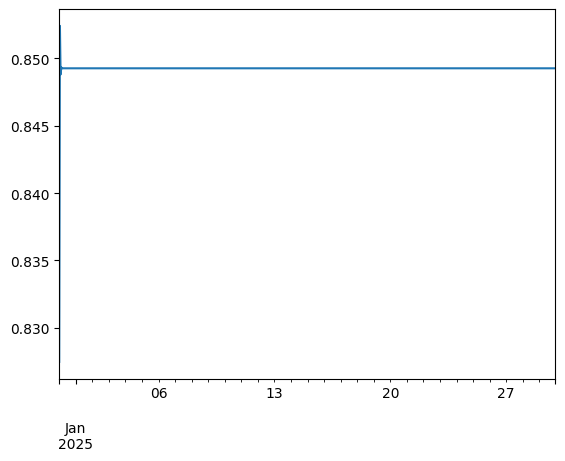

In [ ]:
arima_forecast.plot()

# Prophet Model Training

In [ ]:
train, test = train_test_split(crime_counts_diff, test_size=0.3, shuffle=False)
train_bin, test_bin = train_test_split(crime_counts_binary, test_size=0.3, shuffle=False)

In [ ]:
train_data_prophet = train.reset_index()
train_data_prophet.columns = ['ds', 'y']

In [ ]:
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(train_data_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3_x04qq/5w51eic4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3_x04qq/h2zb587k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4995', 'data', 'file=/tmp/tmpx3_x04qq/5w51eic4.json', 'init=/tmp/tmpx3_x04qq/h2zb587k.json', 'output', 'file=/tmp/tmpx3_x04qq/prophet_modely_q7bjnu/prophet_model-20250227120758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:07:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model.make_future_dataframe(periods=len(test), freq='H')
forecast_prophet = prophet_model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [ ]:
prophet_forecast = forecast_prophet['yhat'][-len(test):]
prophet_forecast_binary = (prophet_forecast > threshold).astype(int)

In [ ]:
prophet_accuracy = accuracy_score(test_bin, prophet_forecast_binary)
prophet_precision = precision_score(test_bin, prophet_forecast_binary)
prophet_recall = recall_score(test_bin, prophet_forecast_binary)
prophet_f1 = f1_score(test_bin, prophet_forecast_binary)

In [ ]:
prophet_metrics = {
    'Accuracy': prophet_accuracy,
    'Precision': prophet_precision,
    'Recall': prophet_recall,
    'F1 Score': prophet_f1
}

print(prophet_metrics)

{'Accuracy': 0.7352449041679343, 'Precision': 0.7310735339745579, 'Recall': 0.9985167920330543, 'F1 Score': 0.8441180421835117}


In [ ]:
prophet_forecast = forecast_prophet['yhat'][-24:]

In [ ]:
prophet_mse = mean_squared_error(crime_counts_diff[-24:], prophet_forecast)
prophet_rmse = np.sqrt(prophet_mse)
prophet_mape = mean_absolute_percentage_error(crime_counts_diff[-24:], prophet_forecast)

In [ ]:
prophet_metrics = {
    'MSE': prophet_mse,
    'RMSE': prophet_rmse,
    'MAPE': prophet_mape
}

print(prophet_metrics)

{'MSE': 551.6715077833242, 'RMSE': 23.487688429969523, 'MAPE': 6.50152275038793e+16}


<Axes: >

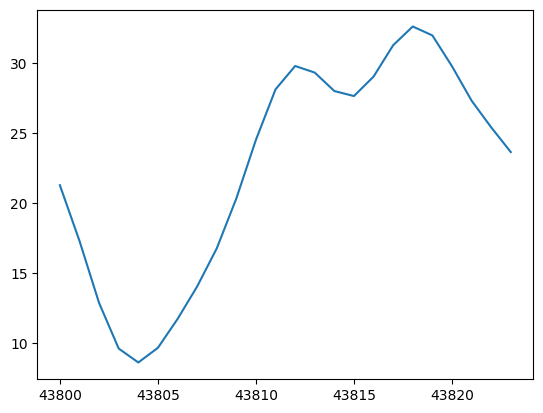

In [ ]:
prophet_forecast.plot()

In [ ]:
prophet_forecast = forecast_prophet['yhat'][-168:]

In [ ]:
prophet_mse = mean_squared_error(crime_counts_diff[-168:], prophet_forecast)
prophet_rmse = np.sqrt(prophet_mse)
prophet_mape = mean_absolute_percentage_error(crime_counts_diff[-168:], prophet_forecast)

In [ ]:
prophet_metrics = {
    'MSE': prophet_mse,
    'RMSE': prophet_rmse,
    'MAPE': prophet_mape
}

print(prophet_metrics)

{'MSE': 464.6519805364202, 'RMSE': 21.555787634331995, 'MAPE': 1.3471323157991818e+16}


<Axes: >

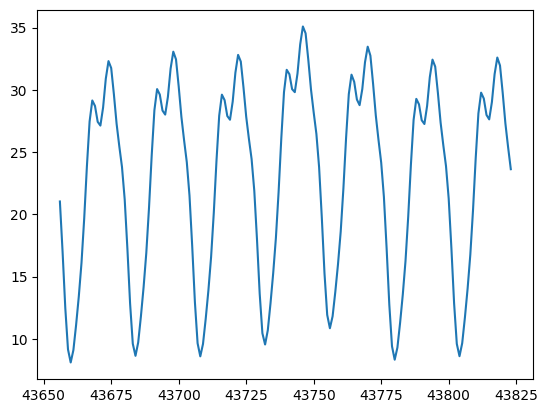

In [ ]:
prophet_forecast.plot()

In [ ]:
prophet_forecast = forecast_prophet['yhat'][-720:]

In [ ]:
prophet_mse = mean_squared_error(crime_counts_diff[-720:], prophet_forecast)
prophet_rmse = np.sqrt(prophet_mse)
prophet_mape = mean_absolute_percentage_error(crime_counts_diff[-720:], prophet_forecast)

In [ ]:
prophet_metrics = {
    'MSE': prophet_mse,
    'RMSE': prophet_rmse,
    'MAPE': prophet_mape
}

print(prophet_metrics)

{'MSE': 324.1908945505328, 'RMSE': 18.005301845582395, 'MAPE': 3838356507799613.0}


<Axes: >

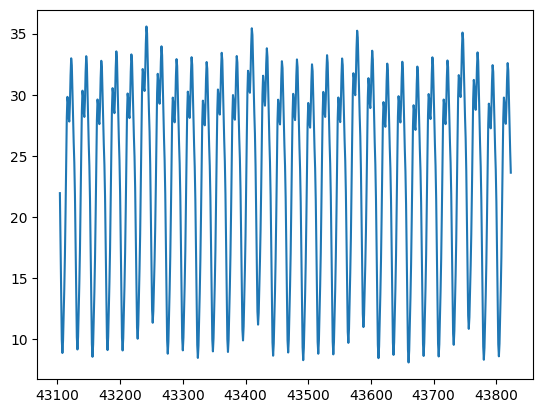

In [ ]:
prophet_forecast.plot()

In [ ]:
prophet_forecast = forecast_prophet['yhat'][-8640:]

In [ ]:
prophet_mse = mean_squared_error(crime_counts_diff[-8640:], prophet_forecast)
prophet_rmse = np.sqrt(prophet_mse)
prophet_mape = mean_absolute_percentage_error(crime_counts_diff[-8640:], prophet_forecast)

In [ ]:
rophet_metrics = {
    'MSE': prophet_mse,
    'RMSE': prophet_rmse,
    'MAPE': prophet_mape
}

print(prophet_metrics)

{'MSE': 324.1908945505328, 'RMSE': 18.005301845582395, 'MAPE': 3838356507799613.0}


<Axes: >

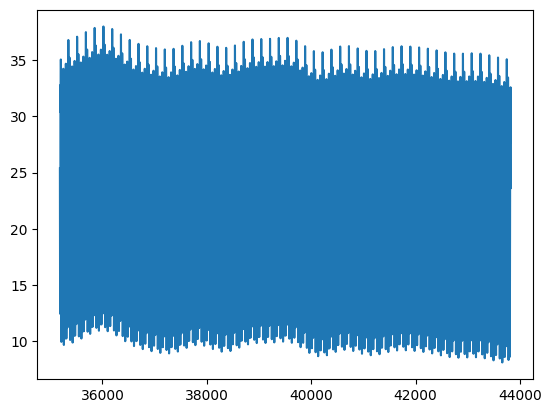

In [ ]:
prophet_forecast.plot()

# Combining ARIMA and Prophet Model

# Visualization using GNN and Heatmap

In [46]:
crime_locations = df[['LAT', 'LON']].dropna()

In [47]:
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

In [48]:
heat_data = [[row['LAT'], row['LON']] for index, row in crime_locations.iterrows()]
HeatMap(heat_data).add_to(la_map)

In [49]:
la_map

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
heatmaps = []

# Sample crime data with LAT, LON, and datetime (assuming df is already loaded)
df['datetime'] = pd.to_datetime(df['DATE OCC'].astype(str) + ' ' + df['TIME OCC'].astype(str))
df.set_index('datetime', inplace=True)

# Step 1: Resample or group the data by hour
df['hour'] = df.index.hour  # Extract the hour of the day

# Create a folium map centered around LA coordinates
base_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Step 2: Generate heatmaps for each hour of the day
for hour in range(24):
    # Filter the crime data for this particular hour
    hourly_data = df[df['hour'] == hour]

    # Get LAT, LON coordinates for the crimes that happened in this hour
    crime_locations = hourly_data[['LAT', 'LON']].dropna()

    if len(crime_locations) > 0:
        # Create a heatmap for the hour
        hour_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)
        heat_data = [[row['LAT'], row['LON']] for index, row in crime_locations.iterrows()]
        HeatMap(heat_data).add_to(hour_map)

        heatmaps.append(hour_map)

# Now, you will have an HTML file for each hour showing the crime heatmap for that specific time.


In [ ]:
heatmaps[0]

In [ ]:
figures = []

for hour in range(24):
    # Filter the crime data for this particular hour
    hourly_data = df[df['hour'] == hour]

    # Get LAT, LON coordinates for the crimes that happened in this hour
    crime_locations = hourly_data[['LAT', 'LON']].dropna()

    if len(crime_locations) > 0:
        # Step 3: Create heatmap for the hour using Plotly
        fig = px.density_mapbox(crime_locations, lat='LAT', lon='LON',
                                radius=5, # Adjust radius for heatmap spread
                                hover_name=crime_locations.index,
                                mapbox_style="carto-positron", # Map style
                                title=f'Crime Heatmap for Hour {hour}:00')

        figures.append(fig)

In [ ]:
# Step 4: Display the heatmaps for each hour
figures[0].show()

In [ ]:
# Step 4: Display the heatmaps for each hour
figures[12].show()

Output hidden; open in https://colab.research.google.com to view.

In [50]:
random_subset = crime_locations.sample(n=200, random_state=42)
heat_data = [[row['LAT'], row['LON']] for index, row in random_subset.iterrows()]

HeatMap(heat_data).add_to(la_map)

In [51]:
la_map

Output hidden; open in https://colab.research.google.com to view.

In [52]:
random_subset = crime_locations.sample(n=100, random_state=42)
heat_data = [[row['LAT'], row['LON']] for index, row in random_subset.iterrows()]

HeatMap(heat_data).add_to(la_map)

In [53]:
la_map

Output hidden; open in https://colab.research.google.com to view.

In [54]:
random_subset = crime_locations.sample(n=50, random_state=42)
heat_data = [[row['LAT'], row['LON']] for index, row in random_subset.iterrows()]

HeatMap(heat_data).add_to(la_map)

In [55]:
la_map

Output hidden; open in https://colab.research.google.com to view.